In [9]:
import numpy as np
import matplotlib.pyplot as plt
import prospect.io.read_results as pread
import glob
import pandas as pd
#import fsps

In [13]:
def find_nearest(array,value):
    idx = (np.abs(np.array(array)-value)).argmin()
    return idx

In [14]:
def get_best(res, **kwargs):
    """Get the maximum a posteriori parameters.                                                                                                               
    From prospect.utils.plotting                                                                                                                              
    """
    imax = np.argmax(res['lnprobability'])
    # there must be a more elegant way to deal with differnt shapes                                                                                           
    try:
        i, j = np.unravel_index(imax, res['lnprobability'].shape)
        theta_best = res['chain'][i, j, :].copy()
    except(ValueError):
        theta_best = res['chain'][imax, :].copy()

    theta_names = res.get('theta_labels', res['model'].theta_labels())
    return theta_names, theta_best

In [11]:
#attenuation from prospector

gal = 330

dir_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_ultra_mist/dirichlet/sfh3/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'
#cont_file = '/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_ultra_mist/continuity/snap305.galaxy'+"{:03d}".format(gal)+'_*.h5'


res_dir, res_cont, res_tau, res_ultra = 0, 0, 0, 0

for file in glob.glob(dir_file):
    res_dir, _, _ = pread.results_from(file)
    
#for file in glob.glob(cont_file):
#    res_cont, _, _ = pread.results_from(file)


0

In [12]:
#pd_atten = np.load('/Volumes/ufrc/narayanan/s.lower/pd_runs/simba_m25n512/snap305_boxtest/attenuation_curves/unfiltered/attenuation_curve.305_galaxy'+str(gal)+'.npz')
filt_atten = np.load('/Volumes/ufrc/narayanan/s.lower/pd_runs/simba_m25n512/snap305_boxtest/attenuation_curves/attenuation_curve.305_galaxy330.npz')

In [ ]:
pd_wav = pd_atten['wav_rest']
pd_tau = pd_atten['tau']
pd_tauv = pd_atten['tau_v']
pd_V = find_nearest(pd_wav, 0.55)

In [14]:
filt_wav = filt_atten['wav_rest']
filt_tau = filt_atten['tau']
filt_tauv = filt_atten['tau_v']

#filt_V = find_nearest(filt_wav, 0.55)

In [1]:
a = [4, 7, 2, 5]

In [2]:
a.sort()

In [3]:
a

[2, 4, 5, 7]

In [17]:
#sps_dir = pread.get_sps(res_dir)
thetas_dir, theta_best_dir = get_best(res_dir)
dust2_idx_dir = [i for i, s in enumerate(thetas_dir) if 'dust2' in s]
uvb_idx_dir = [i for i, s in enumerate(thetas_dir) if 'uvb' in s]
uvb_dir = theta_best_dir[uvb_idx_dir[0]]
dust2_dir = theta_best_dir[dust2_idx_dir[0]]
dustindex_idx_dir = [i for i, s in enumerate(thetas_dir) if 'dust_index' in s]
dust_index_dir = theta_best_dir[dustindex_idx_dir[0]]
dust1f_idx_dir = [i for i, s in enumerate(thetas_dir) if 'dust1_fraction' in s]
dust1f_dir = theta_best_dir[dust1f_idx_dir[0]]

In [18]:
uvb_dir, dust_index_dir, dust2_dir, (dust1f_dir * dust2_dir)

(0.03490375466820303,
 0.3999884303224257,
 0.9375087367187613,
 0.0005539440130794597)

In [118]:
#sps_cont = pread.get_sps(res_cont)
thetas_cont, theta_best_cont = get_best(res_cont)
dust2_idx_cont = [i for i, s in enumerate(thetas_cont) if 'dust2' in s]
dust2_cont = theta_best_cont[dust2_idx_cont[0]]
uvb_idx_cont = [i for i, s in enumerate(thetas_cont) if 'uvb' in s]
uvb_cont = theta_best_dir[uvb_idx_cont[0]]
dustindex_idx_cont = [i for i, s in enumerate(thetas_cont) if 'dust_index' in s]
dust_index_cont = theta_best_cont[dustindex_idx_cont[0]]

In [28]:
sps_ultra = pread.get_sps(res_ultra)
thetas_ultra, theta_best_ultra = get_best(res_ultra)
dust2_idx_ultra = [i for i, s in enumerate(thetas_ultra) if 'dust2' in s]
dust2_ultra = theta_best_ultra[dust2_idx_ultra[0]]
uvb_idx_ultra = [i for i, s in enumerate(thetas_ultra) if 'uvb' in s]
uvb_ultra = theta_best_ultra[uvb_idx_ultra[0]]
dustindex_idx_ultra = [i for i, s in enumerate(thetas_ultra) if 'dust_index' in s]
dust_index_ultra = theta_best_ultra[dustindex_idx_ultra[0]]

In [29]:
sps_tau = pread.get_sps(res_tau)
thetas_tau, theta_best_tau = get_best(res_tau)
dust2_idx_tau = [i for i, s in enumerate(thetas_tau) if 'dust2' in s]
dust2_tau = theta_best_tau[dust2_idx_tau[0]]
dustindex_idx_tau = [i for i, s in enumerate(thetas_tau) if 'dust_index' in s]
dust_index_tau = theta_best_tau[dustindex_idx_tau[0]]

In [19]:
#global attn curve params
dd63=6300.00
lamv=3000.0
dlam=350.0
lamuvb=2175.0

In [168]:
def Cardelli_conroyparam(lam, mwr, uvb):
    x = 1e4 / lam
    y = x - 1.82
    a = np.empty(len(x))
    b = np.empty(len(x))
    attn_curve = np.empty(len(x))
    for i in range(len(x)):
        #print(x[i])
        if x[i] < 1.1:
            a[i] = 0.574*x[i]**(1.61)
            b[i] = ((-0.527*x[i]**(1.61)) / mwr)
        elif x[i] < 3.3:
            a[i] = 1 + 0.177*y[i] - 0.594*y[i]**2 - 0.0243*y[i]**3 + 0.721*y[i]**4 + 0.0198*y[i]**5 - 0.775*y[i]**6 + 0.33*y[i]**7
            b[i] = (1.413*y[i] + 2.283*y[i]**2 + 1.072*y[i]**3 - 5.385*y[i]**4 - 0.622*y[i]**5 + 5.303*y[i]**6 - 2.09*y[i]**7) / mwr
        elif x[i] < 5.9:
            f_a = (3.3 / x[i])**6 * (-0.037 + 0.0469*uvb - (0.601*uvb / mwr) + 0.542/mwr)
            a[i] = 1.752 - 0.316*x[i] - (0.104*uvb / ((x[i] - 4.67)**2 + 0.341)) + f_a
            b[i] = ((-3.09 + 1.825*x[i] + (1.206*uvb / ((x[i] - 4.62)**2 + 0.263))) / mwr)
        elif x[i] < 8.:
            f_a = -0.0447 * (x[i] - 5.9)**2 - 0.00978*(x[i]-5.9)**3
            f_b = 0.213*(x[i]-5.9)**2 + 0.121 * (x[i]-5.9)**3
            a[i] = (1.752 - 0.316*x[i] - (0.104*uvb / ((x[i] - 4.67)**2 + 0.341)) + f_a)
            b[i] = ((-3.09 + 1.825*x[i] + (1.206*uvb / ((x[i] - 4.62)**2 + 0.263)) + f_b) / mwr)
    
    
    for i in range(len(x)):
        attn_curve[i] = (a[i] + b[i])
        
    
    return attn_curve

In [169]:
def Cardelli_fspsparam(lam, dust2, mwr, uvb):
    x = 1e4 / lam
    y = x - 1.82
    a = np.empty(len(x))
    b = np.empty(len(x))
    attn_curve = np.empty(len(x))
    for i in range(len(x)):
        
        
        
        if x[i] > 12.: #far far UV?
            a[i] = -1.073 - 0.628*(12.-8.)+0.137*(12.-8.)**2-0.070*(12.-8.)**3
            b[i] = (13.67+4.257*(12.-8.)-0.42*(12.-8.)**2+0.374*(12.-8.)**3) / mwr
        elif x[i] > 8.: #far UV
            a[i] = -1.073-0.628*(x[i]-8.)+0.137*(x[i]-8.)**2-0.070*(x[i]-8.)**3
            b[i] = (13.67+4.257*(x[i]-8.)-0.42*(x[i]-8.)**2+0.374*(x[i]-8.)**3) / mwr
        elif x[i] > 5.9: #mid-UV
            f_a = -0.04473*(x[i]-5.9)**2-0.009779*(x[i]-5.9)**3
            f_b =  0.2130*(x[i]-5.9)**2+0.1207*(x[i]-5.9)**3
            a[i]  = 1.752-0.316*x[i]-0.104/((x[i]-4.67)**2+0.341)*uvb + f_a
            b[i]  = (-3.09+1.825*x[i]+1.206/((x[i]-4.62)**2+0.263)*uvb + f_b) / mwr
             
        elif x[i] > 3.3: #near UV
            f_a = (3.3/x[i])**6.*(-0.037 + 0.0469*uvb - (0.601*uvb / mwr) + 0.542/mwr)
            a[i] = 1.752-0.316*x[i]-0.104/((x[i]-4.67)**2+0.341)*uvb + f_a
            b[i] = (-3.09+1.825*x[i]+1.206/((x[i]-4.62)**2+0.263)*uvb ) / mwr
            
        elif x[i] > 1.1: #optical - NIR   
            a[i] = 1 + 0.177*y[i] - 0.50477*y[i]**2 - 0.0243*y[i]**3 + 0.721*y[i]**4 + 0.0198*y[i]**5 - 0.7753*y[i]**6 + 0.33*y[i]**7
            b[i] = (1.4134*y[i] + 2.283*y[i]**2 + 1.072*y[i]**3 - 5.385*y[i]**4 - 0.6225*y[i]**5 + 5.303*y[i]**6 - 2.09*y[i]**7) / mwr
        elif x[i] > 0.1:
            a[i] = 0.574*x[i]**1.61
            b[i] = (-0.527*x[i]**1.61) / mwr
    
    
    for i in range(len(x)):
        attn_curve[i] = (a[i] + b[i])
        
    
    return attn_curve*dust2
    
    
    
    

In [170]:
def Kriek_Conroy(lam, dust2, dust_index): 
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78 
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[i])**2 + 0.011*(1.0e4/lam[i])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = (cal00/0.44/4.05)

    eb = 0.85 - (1.9 * dust_index)  #KC13 Eqn 3                                                                                                           

    #Drude profile for 2175A bump                                                                                                                            
    drude = eb*(lam*dlam)**2 / ( (lam**2-lamuvb**2)**2 + (lam*dlam)**2 )

    attn_curve = dust2*(cal00+drude/4.05)*(lam/lamv)**dust_index

    return attn_curve



In [20]:
def Noll09(lam, dust2, dust_index, uvb): 
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78 
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[i])**2 + 0.011*(1.0e4/lam[i])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = (cal00/0.44/4.05)

    eb = uvb                                                                                                          

    #Drude profile for 2175A bump                                                                                                                            
    drude = eb*(lam*dlam)**2 / ( (lam**2-lamuvb**2)**2 + (lam*dlam)**2 )

    attn_curve = dust2*(cal00+drude/4.05)*(lam/lamv)**dust_index

    return attn_curve

In [172]:
def Calzetti(lam, dust2):
    w63 = find_nearest(lam,dd63)
    cal00 = np.zeros(np.shape(lam)[0])
    for i in range(w63, np.shape(lam)[0]):
        cal00[i] = 1.17*( -1.857+1.04*(1.0e4/lam[i])) + 1.78
    for i in range(0, w63):
        cal00[i]= 1.17*(-2.156+1.509*(1.0e4/lam[i]) -0.198*(1.0e4/lam[i])**2 + 0.011*(1.0e4/lam[i])**3) + 1.78
    #R=4.05 NB: I'm not sure I have this normalization correct...                                                                                            
    cal00 = cal00/0.44/4.05
    
    attn_curve = cal00 * dust2
    
    return attn_curve

In [23]:
wav = np.linspace(100, 15000, 10000)
wav5500 = np.full(len(wav), 3000)

In [61]:
dust2_dir

0.26735950105765344

In [24]:
curve_dir = Noll09(wav, dust2_dir, dust_index_dir, uvb_dir) / Noll09(wav5500, dust2_dir, dust_index_dir, uvb_dir)
#curve_cont = Noll09(wav, dust2_cont, dust_index_cont, uvb_cont) / Noll09(wav5500, dust2_cont, dust_index_cont, uvb_cont)
#curve_ultra = Noll09(wav, dust2_ultra, dust_index_ultra, uvb_ultra) / Noll09(wav5500, dust2_ultra, dust_index_ultra, uvb_ultra)
#curve_dir = Kriek_Conroy(wav, dust2_dir, dust_index_dir) / Kriek_Conroy(wav5500, dust2_dir, dust_index_dir)



In [153]:
i = 434
pd_dat = np.load('//Volumes/ufrc/narayanan/s.lower/pd_runs/simba_m25n512/snap305_boxtest/attenuation_curves/attenuation_curve.305_galaxy'+str(i)+'.npz')
prosp_dat = np.load('/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_ultra_mist/dirichlet/dir_atten_galaxy'+"{:03d}".format(i)+'.npz')

wav, tau, tauv = prosp_dat['wave'], prosp_dat['tau'], prosp_dat['tau_v']
filt_wav = pd_dat['wav_rest'] 
filt_tau = pd_dat['tau']
filt_tauv = pd_dat['tau_v']
prosp_curve = (2.5*np.log10(np.exp(tau)))/(2.5*np.log10(np.exp(tauv)))
real_curve = (2.5*np.log10(np.exp(filt_tau[0])))/(2.5*np.log10(np.exp(filt_tauv[0])))
wave_new = np.linspace(filt_wav[0]*1e4, filt_wav[-1]*1e4, len(filt_wav))
smooth_curve = Polynomial.fit(wav[find_nearest(wav, 1000.):find_nearest(wav, 7000.)], prosp_curve[find_nearest(wav, 1000.):find_nearest(wav, 7000.)], 4)
smooth_obs = Polynomial.fit(filt_wav[find_nearest(filt_wav* 1e4, 1000.):find_nearest(filt_wav* 1e4, 7000.)]*1e4, real_curve[find_nearest(filt_wav* 1e4, 1000.):find_nearest(filt_wav* 1e4, 7000.)], 4)


In [9]:
(2.5*np.log10(np.exp(tauv)))

4.164322742960928

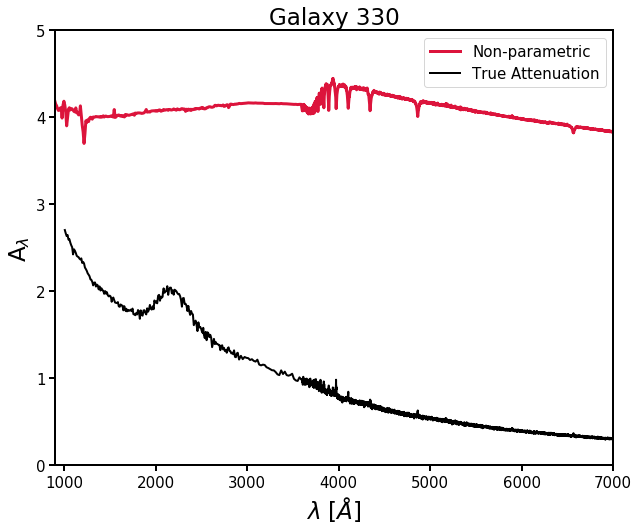

In [32]:
plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', width=2, length=6, labelsize=15)
plt.tick_params(axis='both', which='minor', width=2, length=4)


plt.plot(wav, prosp_curve, color='crimson', lw=3, label='Non-parametric')
#plt.plot(wave_new, smooth_obs(wave_new), color='black', lw=2, label='True Attenuation')
#plt.plot(wave_new, smooth_curve(wave_new), color='crimson', lw=3, label='Non-parametric')
plt.plot(filt_wav*1e4, real_curve , color='black', lw=2, label='True Attenuation')
#plt.plot(wav, (2.5*np.log10(np.exp(tau)))/(2.5*np.log10(np.exp(tauv))), color='crimson', lw=3, label='Non-parametric')
plt.xlim([900, 7000])
plt.xlabel('$\lambda$ [$\AA$]', fontsize=23)
plt.ylim([0., 5])
plt.ylabel('A$_{\lambda}$', fontsize=23)
plt.legend(loc='best', fontsize=15)
plt.title('Galaxy '+str(i), fontsize=23)

#plt.show()
plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/attenuation_curve'+str(i)+'.png', dpi=300, bbox_inches='tight')

In [186]:
dat = np.load('/Volumes/ufrc/narayanan/s.lower/fsps_413nodust.npz', allow_pickle=True)
datd = np.load('/Volumes/ufrc/narayanan/s.lower/fsps_413dust.npz', allow_pickle=True)


In [187]:
cat = np.load('/Volumes/ufrc/narayanan/s.lower/fsps_413nodust_c.npz', allow_pickle=True)
catd = np.load('/Volumes/ufrc/narayanan/s.lower/fsps_413dust_c.npz', allow_pickle=True)


In [188]:
wave = dat['wave']
spec = dat['lum_hz']
specd = datd['lum_hz']

In [189]:
cwave = dat['wave']
cspec = dat['lum_hz']

cwaved = catd['wave']
cspecd = catd['lum_hz']

In [124]:
def find_nearest(array,value):
    idx = (np.abs(np.array(array)-value)).argmin()
    return idx

In [190]:
vband_idx = find_nearest(wav,3000)
vband_extinctiond = np.zeros(spec.shape[0])
vband_extinctionc = np.zeros(spec.shape[0])
for i in range(spec.shape[0]): 
    vband_extinctiond[i] = specd[vband_idx]/spec[vband_idx]
    vband_extinctionc[i] = cspecd[vband_idx]/cspec[vband_idx]


In [191]:
extinctiond = np.zeros([spec.shape[0],len(wave)])
extinctionc = np.zeros([spec.shape[0],len(wave)])
for i in range(specd.shape[0]):
    extinctiond[i,:] = specd[:]/spec[:]
    extinctionc[i,:] = cspecd[:]/cspec[:]

In [192]:
tau = -1.*np.log(extinctiond)
tau_v = -1.*np.log(vband_extinctiond)

ctau = -1.*np.log(extinctionc)
ctau_v = -1.*np.log(vband_extinctionc)

In [193]:
cont_atten = (2.5*np.log10(np.exp(ctau[0])))/(2.5*np.log10(np.exp(ctau_v[0])))
dir_atten = (2.5*np.log10(np.exp(tau[0])))/(2.5*np.log10(np.exp(tau_v[0])))

In [194]:
wave_new = np.linspace(wave[find_nearest(wave, 1000.)], wave[find_nearest(wave, 7000.)], num=1e5)

In [195]:
from numpy.polynomial import Polynomial

dsmooth = Polynomial.fit(wave[find_nearest(wave, 1000.):find_nearest(wave, 7000.)], dir_atten[find_nearest(wave, 1000.):find_nearest(wave, 7000.)], 6)
csmooth = Polynomial.fit(wave[find_nearest(wave, 1000.):find_nearest(wave, 7000.)], cont_atten[find_nearest(wave, 1000.):find_nearest(wave, 7000.)], 6)

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm

In [2]:
#gals = []
ratios = []
for i in range(1000):
    try:
        pd_dat = np.load('//Volumes/ufrc/narayanan/s.lower/pd_runs/simba_m25n512/snap305_boxtest/attenuation_curves/attenuation_curve.305_galaxy'+str(i)+'.npz')
        prosp_dat = np.load('/Volumes/ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_ultra_mist/dirichlet/sfh3/dir_atten_galaxy'+"{:03d}".format(i)+'.npz')
    except: continue
    #gals.append(i)
    print(i)
    wav, tau, tauv = prosp_dat['wave'], prosp_dat['tau'], prosp_dat['tau_v']
    filt_wav = pd_dat['wav_rest'] 
    filt_tau = pd_dat['tau']
    filt_tauv = pd_dat['tau_v']
    prosp_curve = (2.5*np.log10(np.exp(tau)))#/(2.5*np.log10(np.exp(tauv)))
    real_curve = (2.5*np.log10(np.exp(filt_tau[0])))#/(2.5*np.log10(np.exp(filt_tauv[0])))
    #wave_new = np.linspace(filt_wav[0]*1e4, filt_wav[-1]*1e4, len(filt_wav))
    #smooth_curve = Polynomial.fit(wav[find_nearest(wav, 1000.):find_nearest(wav, 7000.)], prosp_curve[find_nearest(wav, 1000.):find_nearest(wav, 7000.)], 4)
    #smooth_obs = Polynomial.fit(filt_wav[find_nearest(filt_wav* 1e4, 1000.):find_nearest(filt_wav* 1e4, 7000.)]*1e4, real_curve[find_nearest(filt_wav* 1e4, 1000.):find_nearest(filt_wav* 1e4, 7000.)], 4)
    ratio = (2.5*np.log10(np.exp(tauv))) / (2.5*np.log10(np.exp(filt_tauv[0])))
    ratios.append(ratio)





0
1
2
3
4
5
6
8
11
12
13
14
15
16
17
18
20
21
22
23
24
26
27
29
32
33
34
35
36
37
38
42
43
44
45
46
47
49
50
51
52
55
57
58
59
60
61
65
66
68
69
70
71
72
73
74
75
76
77
78
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
96
97
98
99
100
101
102
104
105
107
108
109
110
111
112
113
114
115
116
117
118
120
121
122
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
140
141
142
143
144
145
147
148
149
150
151
152
154
155
156
157
158
159
160
161
162
163
165
166
167
168
169
170
171
172
173
175
176
177
178
179
180
181
182
183
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
228
229
230
231
232
233
234
235
236
237
238
239
241
242
243
244
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
287
288
289
290
291
292
293
294
295
296
297
298
300
301
302
304
305
306
307
309
310
311

KeyboardInterrupt: 

In [5]:
dirich = pd.read_pickle('/Users/sidneylower/Documents/prosp_final_plots/output files/dir_output_new.pkl')

In [6]:
dir_dmass = dirich.loc[(slice(None), list(dict.fromkeys(dirich.index.get_level_values('Time [Gyr]')))[0]), 'Derived Stellar Mass']
dir_imass = dirich.loc[(slice(None), list(dict.fromkeys(dirich.index.get_level_values('Time [Gyr]')))[0]), 'Intrinsic Stellar Mass']
ratio_d = dir_dmass / dir_imass

In [7]:
filt = np.where(np.asarray(ratios) > 0.0)

In [11]:
import matplotlib

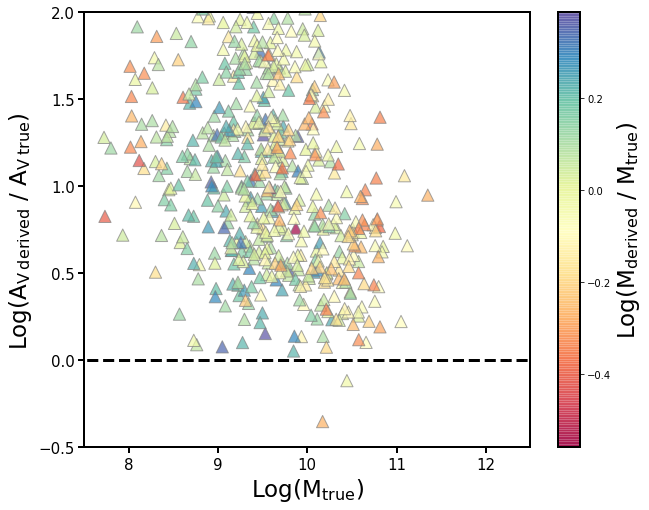

In [15]:
plt.figure(figsize=(10, 8))
plt.rc('axes', linewidth=2)
plt.tick_params(axis='both', which='major', width=2, length=6, labelsize=15)
plt.tick_params(axis='both', which='minor', width=2, length=4)
normalize = matplotlib.colors.Normalize(vmin=np.log10(ratio_d).min(), vmax=np.log10(ratio_d).max())
plt.scatter(np.log10(dir_imass[filt[0]]), np.log10(np.asarray(ratios)[filt[0]]), c=np.log10(ratio_d[filt[0]]), norm=normalize,edgecolor='grey', marker='^',s=150, alpha=0.7)
plt.set_cmap('Spectral')
plt.colorbar().set_label(label='Log(M$_\mathrm{derived}$ / M$_\mathrm{true}$)',size=23)

plt.plot([7, 12.5], [0, 0], color='black', zorder=10, ls='--', lw=3)

plt.xlim([7.5, 12.5])
plt.ylim([-0.5, 2])
plt.xlabel('Log(M$_\mathrm{true}$)', fontsize=23)
#plt.yscale('log')
plt.ylabel('Log(A$_{\mathrm{V} \: \mathrm{derived}}$ / A$_{\mathrm{V} \: \mathrm{true}}$)', fontsize=23)

plt.savefig('/Users/sidneylower/Documents/prosp_final_plots/attenuation_curve_comp.png', dpi=300, bbox_inches='tight')





In [88]:
for i in range(len(ratios)):
    for j in range(len(ratios[i][0])):
        if (ratios[i][0][j] < 0.1) or (ratios[i][0][j] > 10):
                   ratios[i][0][j] = np.nan

In [93]:
sample

array([778,  82, 424, 362, 583, 264, 845, 308, 441, 530, 663, 201, 941,
       664,  60, 320, 271, 154, 483, 693, 732, 898, 815, 912, 403, 926,
       329, 411, 986, 420, 736, 775, 388, 966, 923, 986, 880, 448, 145,
       434, 437, 215, 131, 172, 679, 369, 770, 909, 629, 968])

In [94]:
len(ratios)

904

In [102]:
cm.jet?

In [122]:
import prospect.io.read_results as pread

In [125]:
std1 = []
for galaxy_number in range(500, 1000):
    res, obs, mod = 0, 0, 0
    galaxy_num = "{:03d}".format(galaxy_number)
    infile = '/Volumes//ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_ultra_mist/dirichlet/snap305*.galaxy'+galaxy_num+'_*.h5'
    globfiles = glob.glob(infile)
    if len(globfiles) == 0:
        #print('No files matching glob pattern %s' % infile)
        continue
    for prosp_output in glob.glob(infile):
        res, obs, mod = pread.results_from(prosp_output)
    print(galaxy_num)
    mass_chain = [item[0] for item in res['chain']]
    mass_std = np.std(mass_chain)
    std1.append(mass_std)

500
501


KeyboardInterrupt: 

In [159]:
std2 = []
for galaxy_number in range(1000):
    res, obs, mod = 0, 0, 0
    galaxy_num = "{:03d}".format(galaxy_number)
    infile = '/Volumes//ufrc/narayanan/s.lower/simSEDs/simbam25n512_newfof/snap305_ultra_mist/tau/snap305*.galaxy'+galaxy_num+'_*.h5'
    globfiles = glob.glob(infile)
    if len(globfiles) == 0:
        #print('No files matching glob pattern %s' % infile)
        continue
    for prosp_output in glob.glob(infile):
        res, obs, mod = pread.results_from(prosp_output)
    print(galaxy_num)
    mass_chain = [item[0] for item in res['chain']]
    mass_std = np.std(mass_chain)
    std1.append(mass_std)

000
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
020
021
022
023
024
026
027
028
029
030
031
032
033
034
035
036
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
061
062
063
064
065
066
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
084
085
086
087
088
089
090
091
092
093
094
095
096
097
098
099
100
101
102
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
246
247
248
249
250
251
252
253
254
255
256


In [160]:
np.savez('/Users/sidneylower/Documents/prosp_final_plots/Mscatter_tau.npz', scatter=std1)